In [50]:
!pip install mlxtend

In [92]:
import pandas as pd

df = pd.read_csv('Customer Preference Survey.csv')
df.head(5)

,Timestamp,โปรแกรมแท้,เครื่องซักผ้า,NONE,รองเท้าวิ่ง,ผักกรอบ,คอร์สเรียนเสริม,nintendo switch,BTC (Bitcoin),mechanical keyboard,เครื่องดูดฝุ่น Dyson,เคส ipad,คุณเคยซื้อโต๊ะปรับระดับหรือไม่,สินค้าจากพิมรี่พาย,I PHONE 13,"หูฟัง bluetooth (airpods,truewireless)",แก้วน้ำ Starbucks,เบาะรองนั่ง,เครื่องชงกาแฟแคปซูล,ตั๋วเครื่องบินไปญี่ปุ่น,Ebook,ตู้เย็น,กล้องฟิล์ม,เครื่องดนตรี,whey protein,วัตถุมงคล,กระบองเพชรพูดได้,ROV Skin
0,10/28/2021 14:05:59,NaN,NaN,NaN,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
1,10/28/2021 14:06:18,NaN,NaN,NaN,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ
2,10/28/2021 14:06:20,NaN,NaN,NaN,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
3,10/28/2021 14:06:21,NaN,NaN,NaN,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
4,10/28/2021 14:06:23,NaN,NaN,NaN,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ


In [93]:
df=df.rename(columns={'คุณเคยซื้อโต๊ะปรับระดับหรือไม่':'โต๊ะปรับระดับ'})
# Drop first 3 item
hot_encoded_df = df.iloc[:,4:].reset_index(drop=True).rename_axis('student').copy()
hot_encoded_df.head()

,รองเท้าวิ่ง,ผักกรอบ,คอร์สเรียนเสริม,nintendo switch,BTC (Bitcoin),mechanical keyboard,เครื่องดูดฝุ่น Dyson,เคส ipad,โต๊ะปรับระดับ,สินค้าจากพิมรี่พาย,I PHONE 13,"หูฟัง bluetooth (airpods,truewireless)",แก้วน้ำ Starbucks,เบาะรองนั่ง,เครื่องชงกาแฟแคปซูล,ตั๋วเครื่องบินไปญี่ปุ่น,Ebook,ตู้เย็น,กล้องฟิล์ม,เครื่องดนตรี,whey protein,วัตถุมงคล,กระบองเพชรพูดได้,ROV Skin
student,,,,,,,,,,,,,,,,,,,,,,,,
0,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
1,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ
2,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
3,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
4,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ


In [94]:
# check unique values, and NaN
hot_encoded_df.melt()['value'].value_counts(dropna=False)

ไม่เคยซื้อ    426
เคยซื้อ       240
ไม่เคย         17
เคย            12
NaN             1
Name: value, dtype: int64

In [95]:
# Impute na -> 0
hot_encoded_df.fillna('ไม่เคย', inplace=True)
hot_encoded_df.isna().any().sum()

0

In [96]:
hot_encoded_df.replace({'เคยซื้อ': 1, 'ไม่เคยซื้อ': 0}, inplace=True)
hot_encoded_df.replace({'เคย': 1, 'ไม่เคย': 0}, inplace=True)
hot_encoded_df.head()

,รองเท้าวิ่ง,ผักกรอบ,คอร์สเรียนเสริม,nintendo switch,BTC (Bitcoin),mechanical keyboard,เครื่องดูดฝุ่น Dyson,เคส ipad,โต๊ะปรับระดับ,สินค้าจากพิมรี่พาย,I PHONE 13,"หูฟัง bluetooth (airpods,truewireless)",แก้วน้ำ Starbucks,เบาะรองนั่ง,เครื่องชงกาแฟแคปซูล,ตั๋วเครื่องบินไปญี่ปุ่น,Ebook,ตู้เย็น,กล้องฟิล์ม,เครื่องดนตรี,whey protein,วัตถุมงคล,กระบองเพชรพูดได้,ROV Skin
student,,,,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
1,1,0,1,1,1,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1
2,1,0,1,0,1,0,0,1,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0
3,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,1,0,1,0,0,0,0
4,1,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0


In [98]:
hot_encoded_df.head(5)

,รองเท้าวิ่ง,ผักกรอบ,คอร์สเรียนเสริม,nintendo switch,BTC (Bitcoin),mechanical keyboard,เครื่องดูดฝุ่น Dyson,เคส ipad,โต๊ะปรับระดับ,สินค้าจากพิมรี่พาย,I PHONE 13,"หูฟัง bluetooth (airpods,truewireless)",แก้วน้ำ Starbucks,เบาะรองนั่ง,เครื่องชงกาแฟแคปซูล,ตั๋วเครื่องบินไปญี่ปุ่น,Ebook,ตู้เย็น,กล้องฟิล์ม,เครื่องดนตรี,whey protein,วัตถุมงคล,กระบองเพชรพูดได้,ROV Skin
student,,,,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
1,1,0,1,1,1,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1
2,1,0,1,0,1,0,0,1,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0
3,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,1,0,1,0,0,0,0
4,1,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0


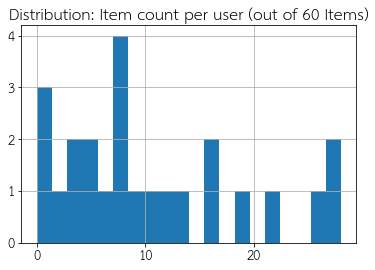

In [120]:
#Item count per User
hot_encoded_df.sum().hist(bins=20)
plt.title('Distribution: Item count per user (out of 60 Items)')
plt.show()

# Market Basket Analysis

In [99]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(hot_encoded_df, min_support=0.05, use_colnames=True)

In [100]:
frequent_itemsets.head().sort_values(by=['support'],ascending=False)

,support,itemsets
0,0.965517,(รองเท้าวิ่ง)
2,0.931034,(คอร์สเรียนเสริม)
4,0.448276,(BTC (Bitcoin))
1,0.344828,(ผักกรอบ)
3,0.241379,(nintendo switch)


In [101]:
frequent_itemsets.describe()

,support
count,6557.000000
mean,0.095087
std,0.066636
min,0.068966
25%,0.068966
50%,0.068966
75%,0.103448
max,0.965517


In [102]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(10).sort_values(by=['support'],ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(รองเท้าวิ่ง),(BTC (Bitcoin)),0.965517,0.448276,0.448276,0.464286,1.035714,0.015458,1.029885
5,(BTC (Bitcoin)),(รองเท้าวิ่ง),0.448276,0.965517,0.448276,1.000000,1.035714,0.015458,inf
0,(รองเท้าวิ่ง),(ผักกรอบ),0.965517,0.344828,0.344828,0.357143,1.035714,0.011891,1.019157
1,(ผักกรอบ),(รองเท้าวิ่ง),0.344828,0.965517,0.344828,1.000000,1.035714,0.011891,inf
2,(nintendo switch),(รองเท้าวิ่ง),0.241379,0.965517,0.241379,1.000000,1.035714,0.008323,inf
3,(รองเท้าวิ่ง),(nintendo switch),0.965517,0.241379,0.241379,0.250000,1.035714,0.008323,1.011494
6,(mechanical keyboard),(รองเท้าวิ่ง),0.172414,0.965517,0.172414,1.000000,1.035714,0.005945,inf
7,(รองเท้าวิ่ง),(mechanical keyboard),0.965517,0.172414,0.172414,0.178571,1.035714,0.005945,1.007496
8,(รองเท้าวิ่ง),(เครื่องดูดฝุ่น Dyson),0.965517,0.068966,0.068966,0.071429,1.035714,0.002378,1.002653
9,(เครื่องดูดฝุ่น Dyson),(รองเท้าวิ่ง),0.068966,0.965517,0.068966,1.000000,1.035714,0.002378,inf


In [103]:
rules.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,389598.000000,389598.000000,389598.000000,389598.000000,389598.000000,389598.000000,3.895980e+05
mean,0.216634,0.216634,0.076116,0.601051,4.132553,0.042824,inf
std,0.207135,0.207135,0.026243,0.336368,3.379976,0.018398,NaN
min,0.068966,0.068966,0.068966,0.071429,1.002469,0.001189,1.001815e+00
25%,0.068966,0.068966,0.068966,0.285714,1.611111,0.030916,1.197044e+00
50%,0.137931,0.137931,0.068966,0.666667,2.900000,0.047562,1.862069e+00
75%,0.275862,0.275862,0.068966,1.000000,5.800000,0.057075,inf
max,0.965517,0.965517,0.758621,1.000000,14.500000,0.124851,inf


In [104]:
rules = rules[ (rules['lift'] >= 1.3) & (rules['confidence'] >= 0.6) ]

In [105]:
rules.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,179314.000000,179314.000000,179314.000000,179314.000000,179314.000000,179314.000000,1.793140e+05
mean,0.084825,0.247605,0.072797,0.894109,5.866376,0.051716,inf
std,0.028197,0.180018,0.015848,0.155144,3.998795,0.013514,NaN
min,0.068966,0.068966,0.068966,0.600000,1.305000,0.016647,1.379310e+00
25%,0.068966,0.103448,0.068966,0.666667,2.416667,0.043995,2.793103e+00
50%,0.068966,0.172414,0.068966,1.000000,4.833333,0.054697,inf
75%,0.103448,0.344828,0.068966,1.000000,9.666667,0.061831,inf
max,0.689655,0.758621,0.413793,1.000000,14.500000,0.124851,inf


In [106]:
rules.head(1000).sort_values(by=['support'],ascending=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2101,(สินค้าจากพิมรี่พาย),"(ตู้เย็น, BTC (Bitcoin))",0.103448,0.172414,0.068966,0.666667,3.866667,0.051130,2.482759
4680,"(รองเท้าวิ่ง, สินค้าจากพิมรี่พาย)","(คอร์สเรียนเสริม, ตั๋วเครื่องบินไปญี่ปุ่น)",0.103448,0.310345,0.068966,0.666667,2.148148,0.036861,2.068966
4685,(สินค้าจากพิมรี่พาย),"(คอร์สเรียนเสริม, รองเท้าวิ่ง, ตั๋วเครื่องบินไ...",0.103448,0.275862,0.068966,0.666667,2.416667,0.040428,2.172414
4701,"(คอร์สเรียนเสริม, รองเท้าวิ่ง, สินค้าจากพิมรี่...",(ตู้เย็น),0.103448,0.413793,0.068966,0.666667,1.611111,0.026159,1.758621
2254,(เครื่องชงกาแฟแคปซูล),"(mechanical keyboard, เคส ipad)",0.103448,0.172414,0.068966,0.666667,3.866667,0.051130,2.482759
...,...,...,...,...,...,...,...,...,...
5936,"(รองเท้าวิ่ง, BTC (Bitcoin))","(เคส ipad, หูฟัง bluetooth (airpods,truewirele...",0.448276,0.689655,0.413793,0.923077,1.338462,0.104637,4.034483
5931,"(รองเท้าวิ่ง, เคส ipad, BTC (Bitcoin))","(หูฟัง bluetooth (airpods,truewireless))",0.413793,0.758621,0.413793,1.000000,1.318182,0.099881,inf
2037,"(เคส ipad, BTC (Bitcoin))","(หูฟัง bluetooth (airpods,truewireless))",0.413793,0.758621,0.413793,1.000000,1.318182,0.099881,inf
5930,"(รองเท้าวิ่ง, เคส ipad, หูฟัง bluetooth (airpo...",(BTC (Bitcoin)),0.689655,0.448276,0.413793,0.600000,1.338462,0.104637,1.379310


In [107]:
ABSOLUTE = rules[rules['confidence'] ==  1]

In [108]:
ABSOLUTEHEAD10 = ABSOLUTE.head(10).sort_values(by=['lift'],ascending=False)

In [109]:
import matplotlib.pyplot as plt
import networkx as nx
item_item_matrix = pd.DataFrame(index=hot_encoded_df.columns,columns=hot_encoded_df.columns)

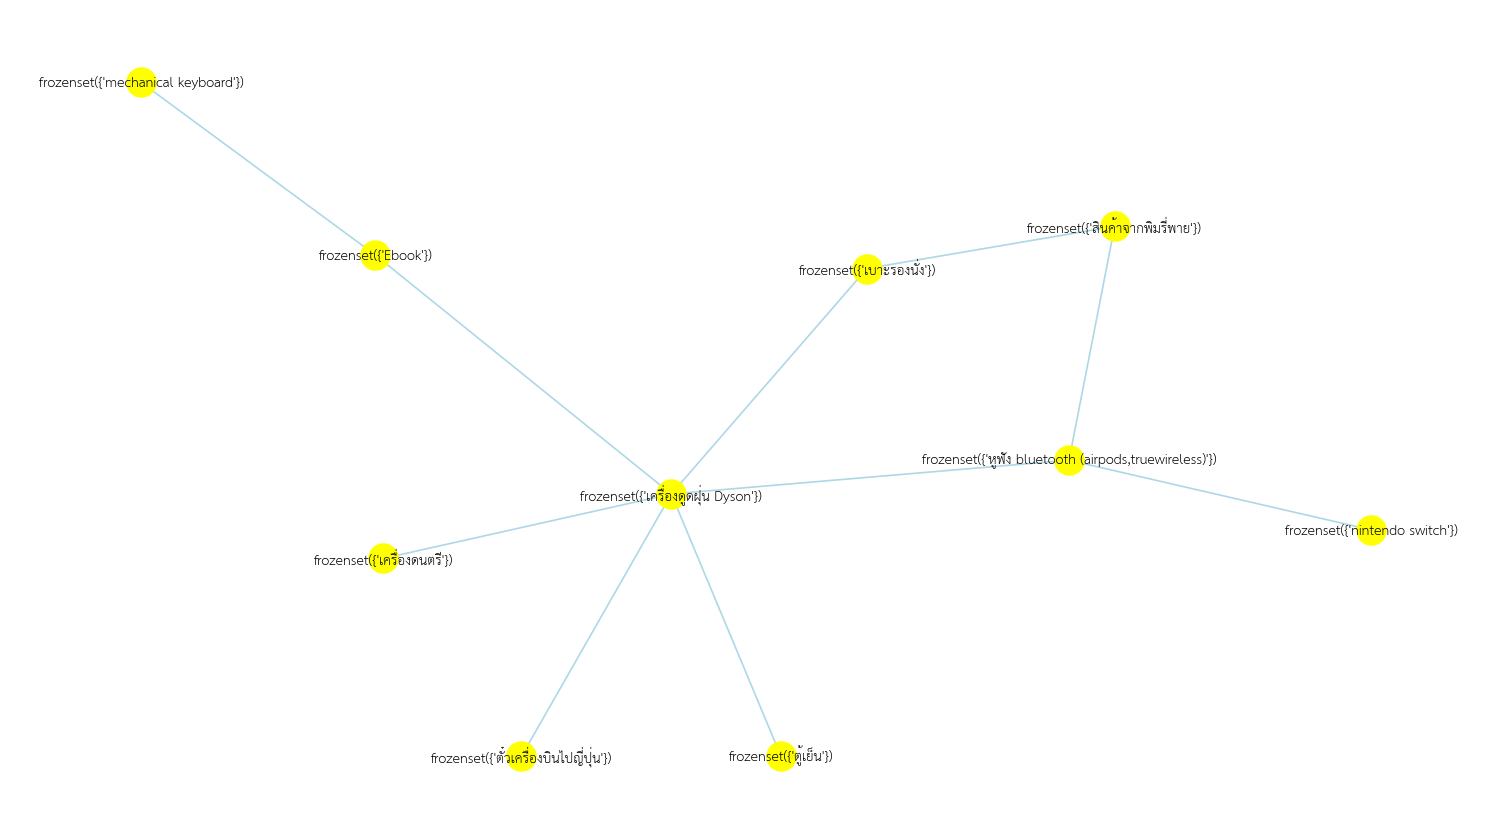

In [110]:
fig, ax=plt.subplots(figsize=[16,9],dpi=120)
labels_params = {'font_family': 'TH Sarabun New', 'alpha':1, 'font_size':12, 'font_color':"black",'font_weight':400,'edge_color':'lightblue','node_color':'yellow'}
GA=nx.from_pandas_edgelist(ABSOLUTEHEAD10,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True,**labels_params)
plt.show()

# Collaborative Filtering - Item Similarity

In [111]:
from scipy.spatial.distance import cosine

for i in range(0,len(item_item_matrix.columns)) :
    # Loop through the columns for each column
    for j in range(0,len(item_item_matrix.columns)) :
      # Fill in placeholder with cosine similarities
      item_item_matrix.iloc[i,j] = 1 -cosine(hot_encoded_df.iloc[:,i],hot_encoded_df.iloc[:,j])

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [112]:
links = item_item_matrix.rename_axis('related item', axis='columns').stack().reset_index()
links.columns = ['item', 'related item','value']
links.head()

,item,related item,value
0,รองเท้าวิ่ง,รองเท้าวิ่ง,1
1,รองเท้าวิ่ง,ผักกรอบ,0.597614
2,รองเท้าวิ่ง,คอร์สเรียนเสริม,0.945611
3,รองเท้าวิ่ง,nintendo switch,0.5
4,รองเท้าวิ่ง,BTC (Bitcoin),0.681385


In [113]:
links_filtered=links.loc[ (links['value'] > 0.1) & (links['item'] != links['related item']) ]
links_filtered.head()

,item,related item,value
1,รองเท้าวิ่ง,ผักกรอบ,0.597614
2,รองเท้าวิ่ง,คอร์สเรียนเสริม,0.945611
3,รองเท้าวิ่ง,nintendo switch,0.5
4,รองเท้าวิ่ง,BTC (Bitcoin),0.681385
5,รองเท้าวิ่ง,mechanical keyboard,0.422577


In [114]:
links_filtered.describe()

,item,related item,value
count,428,428,428.000000
unique,23,23,134.000000
top,รองเท้าวิ่ง,คอร์สเรียนเสริม,0.377964
freq,22,22,12.000000


In [115]:
links_filtered['item'].unique()
# IPHONE 13 หายไปเนื่องจากไม่มีใครซื้อ

array(['รองเท้าวิ่ง', 'ผักกรอบ', 'คอร์สเรียนเสริม', 'nintendo switch',
       'BTC (Bitcoin)', 'mechanical keyboard', 'เครื่องดูดฝุ่น Dyson',
       'เคส ipad', 'โต๊ะปรับระดับ', 'สินค้าจากพิมรี่พาย',
       'หูฟัง bluetooth (airpods,truewireless)', 'แก้วน้ำ Starbucks',
       'เบาะรองนั่ง', 'เครื่องชงกาแฟแคปซูล', 'ตั๋วเครื่องบินไปญี่ปุ่น',
       'Ebook', 'ตู้เย็น', 'กล้องฟิล์ม', 'เครื่องดนตรี', 'whey protein',
       'วัตถุมงคล ', 'กระบองเพชรพูดได้', 'ROV Skin'], dtype=object)

In [116]:
hot_encoded_df.columns

Index(['รองเท้าวิ่ง', 'ผักกรอบ', 'คอร์สเรียนเสริม', 'nintendo switch',
       'BTC (Bitcoin)', 'mechanical keyboard', 'เครื่องดูดฝุ่น Dyson',
       'เคส ipad', 'โต๊ะปรับระดับ', 'สินค้าจากพิมรี่พาย', 'I PHONE 13',
       'หูฟัง bluetooth (airpods,truewireless)', 'แก้วน้ำ Starbucks',
       'เบาะรองนั่ง', 'เครื่องชงกาแฟแคปซูล', 'ตั๋วเครื่องบินไปญี่ปุ่น',
       'Ebook', 'ตู้เย็น', 'กล้องฟิล์ม', 'เครื่องดนตรี', 'whey protein',
       'วัตถุมงคล ', 'กระบองเพชรพูดได้', 'ROV Skin'],
      dtype='object')

In [117]:
import matplotlib as mpl
mpl.__version__

'3.2.2'

In [118]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('THSarabunNew.ttf')
mpl.rc('font',family='TH Sarabun New',size=20)

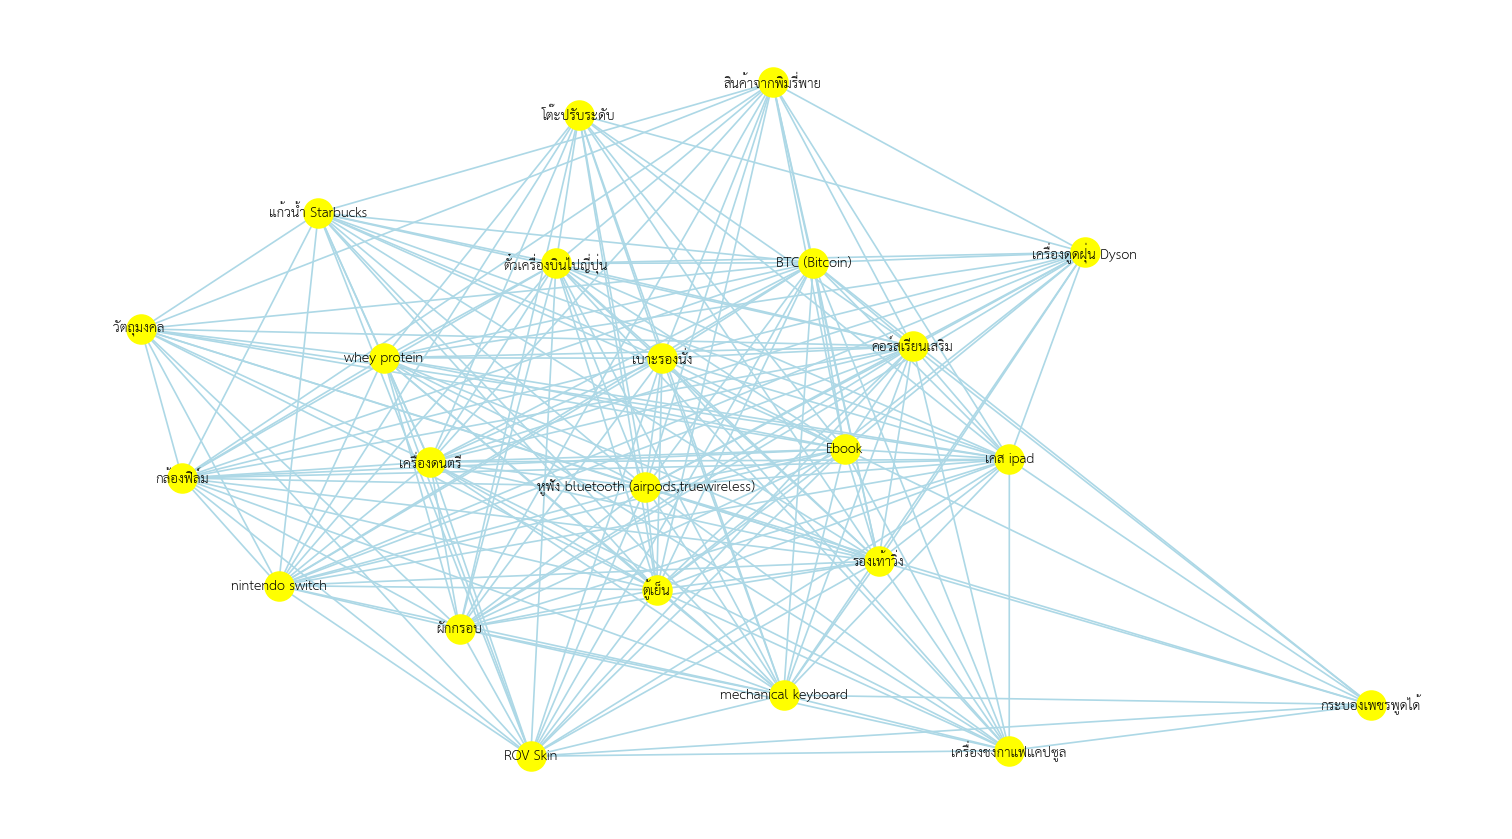

In [119]:
plt.rcParams['font.family'] ='TH Sarabun New'
labels_params = {'font_family': 'TH Sarabun New', 'alpha':1, 'font_size':12, 'font_color':"black",'font_weight':400,'edge_color':'lightblue','node_color':'yellow'}
fig, ax=plt.subplots(figsize=[16,9],dpi=120)
GA=nx.from_pandas_edgelist(links_filtered,source='item',target='related item')
nx.draw(GA,with_labels=True, **labels_params)
plt.show()